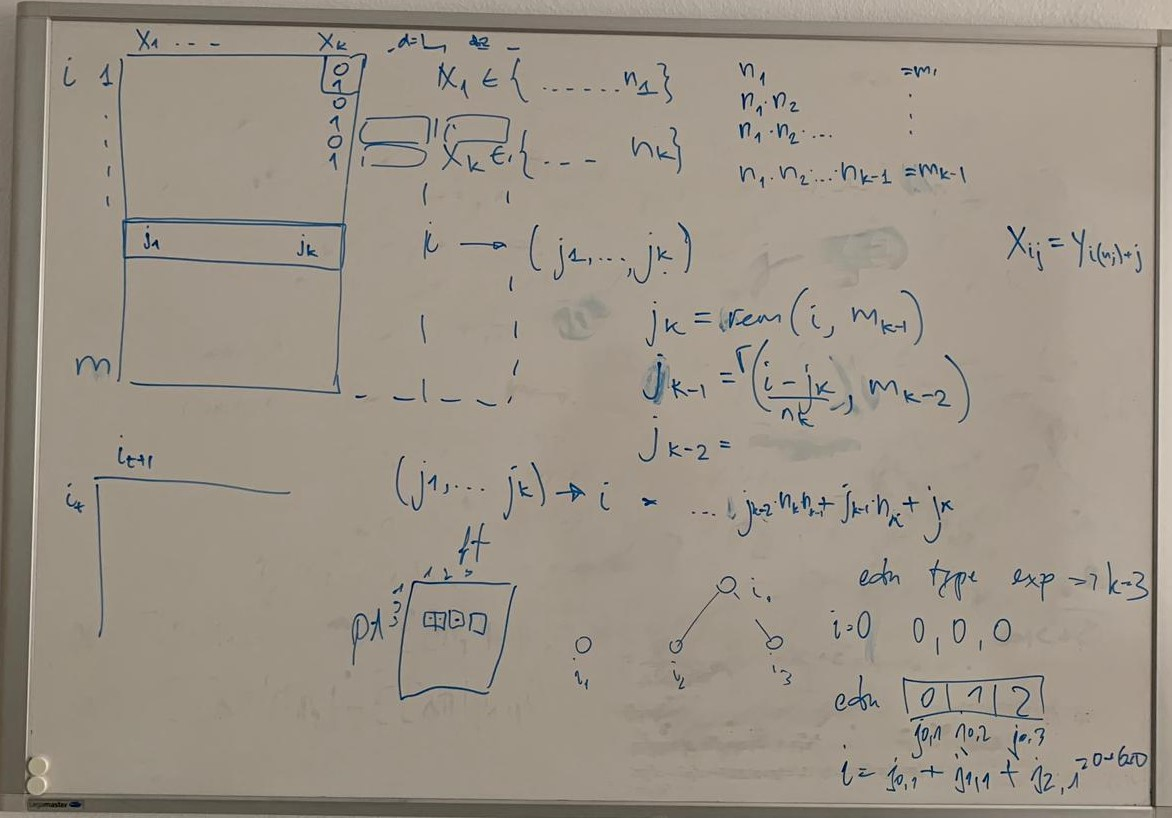

# Keane's state space trick

Michael P. Keane has built up a huge contribution to the research on structural economics which is obvious by his many papers. What is less known is everything which does not make into the papers. Still, it might be as interesting or important for economists doing structural estimation. The "it" is Keane's state space trick.

The following is based on short description by Fedor Ishkakov!!!! and I apologize if the following does not completely match what Keane was doing, but I do think it captures the general idea.

## The problem

The main problem with complex models is that they become memory-hungry monsters because the state space increases exponentially. ``respy`` has this problem as well because we store the states, covariates, and similar objects in big matrices. Even though we try to place some assumptions on the data types to reduce memory, it is definitely not enough. Let's take the states as an example. They are stored in a two-dimensional matrix where rows are states and columns contain the values of state space dimensions. The following table visualizes the states for the Robinson Crusoe Economy. There are three choices, fishing, taling to Friday and staying in the hammock, and Robinson can only acquire experience in the first two and experience with Friday is limited to one. Previous choices are not recorded, but there exist two types of Robinson.

| Number | Period | Experience in fishing | Experience with Friday | Type |
|--------|--------|-----------------------|------------------------|------|
| 0      | 0      | 0                     | 0                      | 0    |
| 1      | 0      | 0                     | 0                      | 1    |
| 2      | 1      | 0                     | 0                      | 0    |
| 3      | 1      | 0                     | 0                      | 1    |
| 4      | 1      | 0                     | 1                      | 0    |
| 5      | 1      | 0                     | 1                      | 1    |
| 6      | 1      | 1                     | 0                      | 0    |
| 7      | 1      | 1                     | 0                      | 1    |
| 8      | 2      | 0                     | 0                      | 0    |
| 9      | 2      | 0                     | 0                      | 1    |
| 10     | 2      | 0                     | 1                      | 0    |
| 11     | 2      | 0                     | 1                      | 1    |
| 12     | 2      | 1                     | 0                      | 0    |
| 13     | 2      | 1                     | 0                      | 1    |
| 14     | 2      | 1                     | 1                      | 0    |
| 15     | 2      | 1                     | 1                      | 1    |
| 16     | 2      | 2                     | 0                      | 0    |
| 17     | 2      | 2                     | 0                      | 1    |


If the model becomes more complex, this table increases in the number of rows and columns. There exist also another table in the same format which holds the covariates for each state and so on. The table also contains some redundancy as the states are duplicated for each type.

Additionally, Keane faced the problem that multi-dimensional arrays have not been supported at this time in either FORTRAN or C or a similar language.

## The solution

Keane's idea is to say that we do not need this table at all. The core of information is kept in just three sets of values. One contains all possible values of periods, the second all admissible experience levels, and the third contains the types. Let us call the sets $d_p$, $d_f$, and $d_t$.

$$\begin{align}
    d_p &= \{0, 1, \dots\} \\
    d_f &= \{0, 1, \dots\} \\
    d_t &= \{0, 1\}
\end{align}$$

Using the sets, the first state with index 0 takes the first elements of each set. The second state with index 1 and takes the first elements of the first two sets and the second element of the last set and so on. We can formalize this process as function which receives the state number $i$ and calculates the indices $j_p$, $j_f$, and $j_t$ which pick the state's elements.

Define $n_p$, $n_f$, and $n_t$ as the number of unique values in each set, Furthermore, $m_1 = n_p$ and $m_2 = n_p * n_f$.

Then, for any state $i$

$$\begin{align}
    j_t &= mod(i, m_2) \\
    j_f &= mod(\frac{i - j_t}{n_t}, m_1) \\
    j_p &= 
\end{align}$$

where $mod$ is the modulo.

## An example

Let us fix the model to ten periods and we want to have the indices for state $i = 0$. Then,

$$\begin{align}
    j_t &= mod(0, 10 * 10) = 0 \\
    j_f &= mod(\frac{0 - 0}{10}, 10) = 0 \\
    j_p &= = 0
\end{align}$$

For $i = 1$

$$\begin{align}
    j_t &= mod(1, 10 * 10) = 1 \\
    j_f &= mod(\frac{1 - 1}{10}, 10) = 0 \\
    j_p &= = 0
\end{align}$$

For $i = 2$

$$\begin{align}
    j_t &= mod(2, 10 * 10) = 0 \\
    j_f &= mod(\frac{0 - 0}{10}, 10) = 0 \\
    j_p &= = 0
\end{align}$$

In [27]:
for i in range(6 * 2 * 2):
    j_t = i % 2
    j_f = ((i - j_t) // 2) % 2
    j_p = ((i - j_f - j_t)) % 3
    
    print(i, "\t", j_p, "\t", j_f, "\t", j_t)

0 	 0 	 0 	 0
1 	 0 	 0 	 1
2 	 1 	 1 	 0
3 	 1 	 1 	 1
4 	 1 	 0 	 0
5 	 1 	 0 	 1
6 	 2 	 1 	 0
7 	 2 	 1 	 1
8 	 2 	 0 	 0
9 	 2 	 0 	 1
10 	 0 	 1 	 0
11 	 0 	 1 	 1
12 	 0 	 0 	 0
13 	 0 	 0 	 1
14 	 1 	 1 	 0
15 	 1 	 1 	 1
16 	 1 	 0 	 0
17 	 1 	 0 	 1
18 	 2 	 1 	 0
19 	 2 	 1 	 1
20 	 2 	 0 	 0
21 	 2 	 0 	 1
22 	 0 	 1 	 0
23 	 0 	 1 	 1
